# Big Mart Sales prediction with Regression, Decision Tree, and Random Forest models.

In this project, we will analyze the public Big Mart Sales dataset. This dataset contains info about many store products in different cities. Based on Problem Statement below, we will try to create a model to predict the sales.

**Problem Statement:**
*The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.*

**Columns description:**

- Item_Identifier: Unique product ID

- Item_Weight: Weight of product

- Item_Fat_Content: Whether the product is low fat or not

- Item_Visibility: The % of total display area of all products in a store allocated to the particular product

- Item_Type: The category to which the product belongs

- Item_MRP: Maximum Retail Price (list price) of the product

- Outlet_Identifier: Unique store ID

- Outlet_Establishment_Year: The year in which store was established

- Outlet_Size: The size of the store in terms of ground area covered

- Outlet_Location_Type: The type of city in which the store is located

- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

- Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

## Data Exploration

Initially, we have the training and test datasets already separated. We will import them and check some info.

In [1]:
import pandas as pd 
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
print('Train: ', train.shape)
print('Test: ', test.shape)

Train:  (8523, 12)
Test:  (5681, 11)


Before performing the data analysis, let's join the two datasets in just one to avoid doing the same process two times.

Thereunto, we will create a new "source" column for both datasets that will be the reference for the new set. With that reference, we will be able to split the data again later.

In [5]:
#creating a new collumn with the reference
train['source'] = 'train'
test['source'] = 'test'

#binding the train and test datasets
data = pd.concat([train, test], ignore_index=True)
print('Full data: ', data.shape)

Full data:  (14204, 13)


C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [6]:
data.head(10)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,train


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


With the full dataset ready, let's explore some basics statistical info about the numerical variables.

In [8]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


We have some observations:

- The **Item_Visibility** variable has a min value of 0. In practice, when a specific product is being sold in a store, it's visibility can not be 0.

- The **Outlet_Establishment_Year** variable has values from 1985 to 2009.  This value type might not be the best form to analyze the impact on sales based on how old is a store.

Following, we will verify the categorical variables. By looking at the dataset, it seems that some variables have different categories. To confirm, let's check the unique values for each categorical variable.

In [9]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

We can see that exists 10 stores, with 1559 products of 16 different types. To go further with the analysis, let's check the frequency of the different categories in each nominal variable.

In [10]:
#filtering the unique values and dropping ID's and source
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x] == 'object']

categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier',
                        'Outlet_Identifier', 'source']]

#showing the categories frequency
for col in categorical_columns:
    print('\nFrequency of variable %s'%col)
    print(data[col].value_counts())


Frequency of variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of variable Outlet_Type
Supermarket Type1    92

Looking at the Item_Fat_Content variable, we can notice that are three representations for "Low Fat" (Low Fat, LF, and low fat) and two for "Regular" (Regular and reg). It is a good idea to normalize these categories by removing redundancies.

# Data Wrangling

In this section, we will clean the data and perform some modifications based on previous observations. First, let's verify the presence of the missing values.

In [11]:
#checking missing values
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

There are two variables with missing values that require treatment for the predictive model to reach the best performance.

For the Item_Weight variable, we will input the missing values with the average weight of all items. For the Outlet_Size, we will input with mode, the value with most frequency in all distribution. 

In [12]:
#inputting Item_Weight by mean
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

#obtaining a boolean variable to show when is null
miss_bool = data['Item_Weight'].isnull()
print('Original missing values: %d' %sum(miss_bool))
data.loc[miss_bool,'Item_Weight']  = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])
print('Final missing values: %d' % sum(data['Item_Weight'].isnull()))

Original missing values: 2439
Final missing values: 0


In [13]:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print('\nMode for each Outlet_Type: ')
print(outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print('\nOrignal missing values: %d'% sum(miss_bool))
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print('Final missing values: ', sum(data['Outlet_Size'].isnull()))


Mode for each Outlet_Type: 
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal missing values: 4016
Final missing values:  0


As observed before, the Item_Visibility variable has a min value of 0, which is no practical sense. To treat that incoherence, we will input the average value instead.

In [14]:
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')  
miss_bool = data['Item_Visibility'] == 0
print('Number of 0 values initially: %d' %sum(miss_bool))
data.loc[miss_bool, 'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
print('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


With the missing values handled, we will perform a modification in the Item_Type variable.

Earlier, we recognized that there are 16 different categories. If we look at the values of the Item_Identifier variable, we can see that the first two letters are the product type (FD, DR, and NC), with the next therms being the particular ID. For the analysis, it is a good idea to combine these 16 categories in just three: Food, Drinks, and Non-Consumable. So, we will create a new column with only the name of each category (Food, Drinks, and Non-Consumables).

In [15]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

#renaming the categories
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({ 'FD': 'Food',
                                                            'NC': 'Non-Consumable',
                                                            'DR': 'Drinks'})

data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

Following, we will convert the values of the Outlet_Year variable in "operation time" until 2013, the year of data collection according to Problem Statement.

In [16]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

Thereby, we can see that the older store has 28 years operating, while the newest one only 4.

Next, we will treat the Item_Fat_Content variable. As there is more than one representation of the same category, it is a good practice to combine in only one.

In [17]:
print('Before:')
print(data['Item_Fat_Content'].value_counts())

#replacing categories
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({ 'LF': 'Low Fat',
                                                            'reg': 'Regular',
                                                            'low fat': 'Low Fat'})

print('\nAfter:')
print( data['Item_Fat_Content'].value_counts())

Before:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

After:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [18]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,Food,15
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable,26


Looking at the dataset, we can observe that after the creation of the Item_Type_Combined variable, an inconsistency has arisen. As can be seeing in the fourth line above, for example, a "Non-Consumable" product has a "Low Fat" attribution. To fix these cases, we will create a new category named "Non-Edible".

In [19]:
data.loc[data['Item_Type_Combined'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [20]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,Food,15
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable,26


Checking the dataset again, we have the new "Non-Edible" category correctly assigned.

The next step is to convert the data to fit in the predictive model. So, we will transform the categorical data in numerical.

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#creating a new collumn for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

#creating a list for all categorical ones
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [22]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined,Outlet_Years,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,0,1,1,train,1,14,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,train,0,4,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,0,1,1,train,1,14,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,2,2,0,train,1,15,0
4,1,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,2,0,1,train,2,26,1


After converting process, we will perform a **One-Hot** encoding. This method transforms the categorical attributes represented as numeric, whose order is not relevant. That is, to prevent the predictive model from interpreting the data as numerical, it creates new binary variables where 0 and 1 correspond to the possible values for the attribute. The "1" value indicates the category.

In [23]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'], dtype=float)

In [24]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Fat_Content_0           float64
Item_Fat_Content_1           float64
Item_Fat_Content_2           float64
Outlet_Location_Type_0       float64
Outlet_Location_Type_1       float64
Outlet_Location_Type_2       float64
Outlet_Size_0                float64
Outlet_Size_1                float64
Outlet_Size_2                float64
Outlet_Type_0                float64
Outlet_Type_1                float64
Outlet_Type_2                float64
Outlet_Type_3                float64
Item_Type_Combined_0         float64
Item_Type_Combined_1         float64
Item_Type_Combined_2         float64
Outlet_0                     float64
O

Now, the variables are of float type, and the categories have their respective binary representations. Let's visualize the Item_Fat_Content variable, for example. 

In [25]:
data[['Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2']].head(5)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


Finally, we will split the train and test datasets and remove the unnecessary variables for the predictive model. 

In [26]:
data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True)   

#split train and test
train = data.loc[data['source'] == 'train']
test = data.loc[data['source'] == 'test']

#dropping unnecessary columns
test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)
train.drop(['source'], axis=1, inplace=True)

C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Model Building

With the data ready, we will build some predictive models to find the best results.

To verify the model generalization and performance, we will use two metrics:
- **Cross-validation**: This metric is useful to have more certainty about the model generalization quality. Although only the test dataset is enough to determine the validation, the cross-validation can improve the verification by the K-Fold method. This method divides the dataset into K parts, using K-1 for training and 1 for testing. For each iteration defined by K value, the training and testing data varies.
- **Root Mean Square Error**: RMSE is the standard deviation of the residuals (prediction errors). It is one of the most used metrics to measure the performance of regressive models and can be defined as the difference between the predicted value and real value as follows:
$$
RMSE = \sqrt{\sum_{i=1}^{n}\frac{(\hat{y}_i-y_i)^2}{n}}
$$

    - $\hat{y}_i$: predicted value;
    - $y_i$: observed values;
    - $n$: number of observations.
    
For both of these metrics in regression problems, the main objective is to obtain the lowest value possible, with the optimal value being zero.

Let's define the target variable and create a function that returns all the model report with RSME and CV score. Also, the function will be capable of making the predictions in testing data and return as a CSV file.

In [27]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

target = 'Item_Outlet_Sales'

IDcol = ['Item_Identifier', 'Outlet_Identifier']

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #fit the algorithm with data
    alg.fit(dtrain[predictors], dtrain[target])
    
    #predict training set
    dtrain_predictors = alg.predict(dtrain[predictors])
    
    #cross-validation
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error', verbose=1)
    cv_score = np.sqrt(np.abs(cv_score))
    
    print('\nModel Report')
    print('RMSE: %.4g' % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictors)))
    print('CV Score: Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g' % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #predict on testing data
    dtest[target] = alg.predict(dtest[predictors])
    
    #showing results
    IDcol.append(target)
    df = pd.DataFrame({ x: dtest[x] for x in IDcol })
    df.to_csv(filename, index=False)

## Linear Regression Model

First, we will try a linear regression approach and verify the model behavior and coefficients influence.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.3s finished
C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Model Report
RMSE: 1128
CV Score: Mean - 1129 | Std - 43.19 | Min - 1075 | Max - 1210


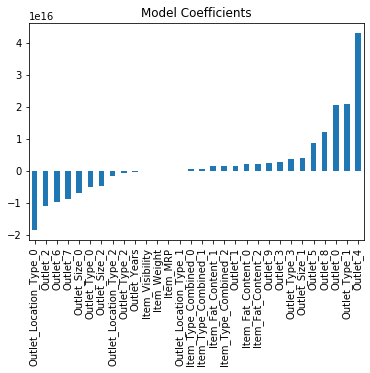

In [65]:
from sklearn.linear_model import LinearRegression

predictors = [x for x in train.columns if x not in [target]+IDcol]
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'lr_model.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')  

Observing the coefficients graph, we can notice a high magnitude for some of them, which may indicate overfitting. We can try to reduce that influence by applying a regression technique named Ridge.

## Ridge Regression Model

Explaining briefly, a Ridge regression can decrease the model complexity by removing attributes with high correlation with each other responsible for increasing noises. Let's implement and verify the performance. 


Model Report
RMSE: 1128
CV Score: Mean - 1130 | Std - 44.6 | Min - 1076 | Max - 1217


C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


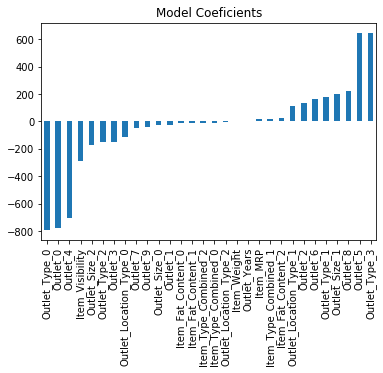

In [51]:
from sklearn.linear_model import Ridge

predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05, normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'rr_model.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coeficients')

Looking at the graph, the Ridge regression removed some of the most noisy attributes from the previous model. Even so, the RMSE and CV scores did not improve, which makes this approach barely viable.

## Decision Tree Model

Trying to improve the predictive performance, we will implement a Decision Tree Model. Unlike linear models, this algorithm can mapping non-linear relations most precisely.

In Decision Tree algorithms, we have the **feature importances**, that refer to assigned scores to the attributes based on how useful they are for the predicting target variable. We will plot the feature importances graph to analyze which variables have more influence on the model's prediction performance.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.6s finished
C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Model Report
RMSE: 1060
CV Score: Mean - 1091 | Std - 44.23 | Min - 1004 | Max - 1174


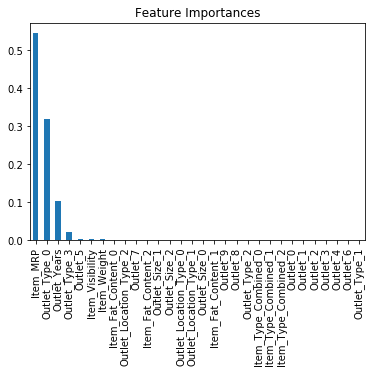

In [66]:
from sklearn.tree import DecisionTreeRegressor

predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'dt_model.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

We can see that RMSE and CV scores have improved. Also, the variables with the most influence on the regression process are Item_MRP, Outlet_Type_0, Outlet_Years, and Outlet_Type_3.

## Random Forest Model

As the final approach, let's try the Random Forest model. Random forests are models that works with ensemble learning technique.


Model Report
RMSE: 1073
CV Score: Mean - 1084 | Std - 44.1 | Min - 1020 | Max - 1161


C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


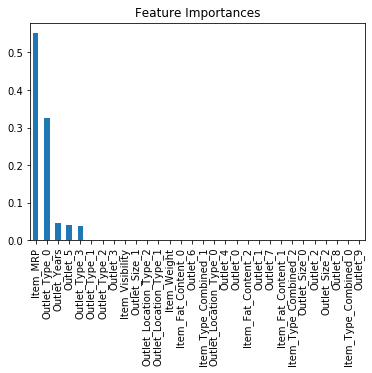

In [59]:
from sklearn.ensemble import RandomForestRegressor

predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=100, n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'rf_model.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


Model Report
RMSE: 1068
CV Score: Mean - 1083 | Std - 43.41 | Min - 1018 | Max - 1158


C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


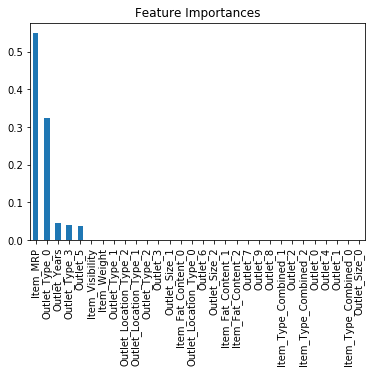

In [61]:
alg6 = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol, 'rf2_model.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')

# Results Summary

Based on the models built above, the Decision Tree algorithm dealt better with the dataset, according to RMSE and CV scores.

| Model | RMSE | CV Score |
|---|---|---|
| Linear Regression | 1128 | 1129 |
| Ridge Regression | 1128 | 1130 |
| Decision Tree | 1060 | 1091 |
| Random Forest | 1068 | 1083 |